Učitati bazu u DataFrame. Proveriti kako izgleda prvih nekoliko vrsta u bazi.

In [11]:
# Ucitavanje biblioteka i funkcija
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# podešavanja ispisa
pd.set_option('display.float_format', lambda x: '%.2f' % x) # prikaz df na 2 decimale (npr. za describe)

In [15]:
from google.colab import files
uploaded = files.upload()

Saving GuangzhouPM20100101_20151231.csv to GuangzhouPM20100101_20151231.csv


In [16]:
import io
df = pd.read_csv(io.BytesIO(uploaded['GuangzhouPM20100101_20151231.csv']))

In [17]:
df.head()

,No,year,month,day,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4.00,NaN,NaN,NaN,9.40,76.00,1015.10,13.50,NW,0.80,0.00,0.00
1,2,2010,1,1,1,4.00,NaN,NaN,NaN,10.20,83.00,1015.20,13.00,cv,0.50,0.00,0.00
2,3,2010,1,1,2,4.00,NaN,NaN,NaN,10.40,87.00,1015.00,12.50,NW,0.60,0.30,0.30
3,4,2010,1,1,3,4.00,NaN,NaN,NaN,10.20,89.00,1014.90,12.00,NW,1.40,0.60,0.90
4,5,2010,1,1,4,4.00,NaN,NaN,NaN,10.40,91.00,1014.60,11.80,NE,0.60,0.70,1.60


Upoznati se sa bazom. Koliko ima obeležja? Koliko ima uzoraka? Šta predstavlja jedan uzorak
baze? Kojim obeležjima raspolažemo? Koja obeležja su kategorička, a koja numerička? Postoje li
nedostajući podaci? Gde se javljaju i koliko ih je? Postoje li nelogične/nevalidne vrednosti?

In [18]:
df.shape


(52584, 17)

In [19]:
df.dtypes

No                        int64
year                      int64
month                     int64
day                       int64
hour                      int64
season                  float64
PM_City Station         float64
PM_5th Middle School    float64
PM_US Post              float64
DEWP                    float64
HUMI                    float64
PRES                    float64
TEMP                    float64
cbwd                     object
Iws                     float64
precipitation           float64
Iprec                   float64
dtype: object

In [20]:
print(df.isnull().sum())  #nedostajuci podaci i koliko ih je

No                          0
year                        0
month                       0
day                         0
hour                        0
season                      1
PM_City Station         20232
PM_5th Middle School    31489
PM_US Post              20232
DEWP                        1
HUMI                        1
PRES                        1
TEMP                        1
cbwd                        1
Iws                         1
precipitation               1
Iprec                       1
dtype: int64


Izbaciti obeležja koja se odnose na sve lokacije merenja koncentracije PM čestica osim US Post

In [21]:
df.drop(axis=1, columns = ['PM_City Station', 'PM_5th Middle School'], inplace=True)

In [22]:
df.describe() #Analiza obeležja

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.00,52584.00,52584.00,52584.00,52584.00,52583.00,32352.00,52583.00,52583.00,52583.00,52583.00,52583.00,52583.00,52583.00
mean,26292.50,2012.50,6.52,15.73,11.50,2.49,50.80,16.47,75.85,1005.37,22.00,7.63,0.24,1.09
std,15179.84,1.71,3.45,8.80,6.92,1.12,36.93,87.67,89.51,6.92,6.78,11.97,1.94,7.44
min,1.00,2010.00,1.00,1.00,0.00,1.00,1.00,-9999.00,-9999.00,975.00,1.70,0.00,0.00,0.00
25%,13146.75,2011.00,4.00,8.00,5.75,1.00,24.00,12.40,66.00,1000.10,17.30,1.80,0.00,0.00
50%,26292.50,2012.00,7.00,16.00,11.50,2.00,43.00,19.10,81.00,1005.20,23.50,3.80,0.00,0.00
75%,39438.25,2014.00,10.00,23.00,17.25,3.00,68.00,23.60,91.00,1010.60,26.80,8.60,0.00,0.00
max,52584.00,2015.00,12.00,31.00,23.00,4.00,526.00,27.50,100.00,1027.80,37.40,214.30,99.10,271.90


In [23]:
df.shape

(52584, 15)

Ukoliko postoje nedostajući podaci, rešiti taj problem na odgovarajući način. Objasniti zašto je
rešeno na odabrani način.

In [24]:
df.isna().sum()/df.shape[0] * 100  #procenat nedostajucih vrednosti po obelezjima

No               0.00
year             0.00
month            0.00
day              0.00
hour             0.00
season           0.00
PM_US Post      38.48
DEWP             0.00
HUMI             0.00
PRES             0.00
TEMP             0.00
cbwd             0.00
Iws              0.00
precipitation    0.00
Iprec            0.00
dtype: float64

In [25]:
df['HUMI'].unique()

array([   76.,    83.,    87.,    89.,    91.,    90.,    86.,    82.,
          78.,    75.,    74.,    71.,    73.,    77.,    81.,    84.,
          88.,    92.,    93.,    94.,    63.,    62.,    58.,    65.,
          80.,    85.,    59.,    54.,    55.,    64.,    69.,    72.,
          79.,    70.,    68.,    67.,    66.,    56.,    49.,    47.,
          42.,    38.,    40.,    41.,    46.,    51.,    53.,    52.,
          48.,    50.,    43.,    32.,    31.,    26.,    27.,    30.,
          36.,    37.,    39.,    44.,    57.,    29.,    28.,    25.,
          24.,    21.,    45.,    60.,    61.,    33.,    34.,    35.,
          95.,    98.,    97.,   100.,    96.,    99.,    23.,    20.,
          22.,    18.,    17.,    12.,    15.,    16.,    19., -9999.,
          13.,    14.,    nan])

Prvo moramo srediti nedozvoljene vrednosti. Ne moze procenat biti -9999

In [26]:
df['HUMI'] = df['HUMI'].replace(-9999, np.nan)  #zamenimo vrednost sa nan

In [27]:
df['precipitation'].unique()

array([ 0.        ,  0.3       ,  0.6       ,  0.7       ,  0.5       ,
        0.1       ,  0.4       ,  2.2       ,  2.5       ,  4.6       ,
        1.4       ,  2.4       ,  4.3       ,  1.3       ,  0.2       ,
        1.2       ,  3.        ,  1.5       ,  0.9       ,  1.1       ,
        1.        ,  1.9       ,  0.8       ,  4.7       ,  2.9       ,
        2.7       ,  3.2       ,  7.3       ,  4.4       ,  3.4       ,
        1.8       ,  2.8       ,  1.7       ,  1.6       ,  2.1       ,
        4.8       ,  2.        , 19.3       , 13.4       ,  9.2       ,
        5.        ,  4.2       , 11.        ,  5.5       ,  5.3       ,
       20.2       , 12.6       , 30.5       ,  8.6       ,  3.9       ,
        8.1       ,  3.1       , 10.5       , 99.1       , 63.1       ,
       37.3       , 26.2       ,  2.3       ,  9.6       , 11.8       ,
       32.7       , 32.6       ,  9.4       , 17.9       ,  5.4       ,
        5.1       , 26.4       ,  5.6       ,  3.7       , 10.2 

In [28]:
same = df['precipitation'].isna().eq(df['Iprec'].isna())

if same.all():
  print("Columns 'precipitation' and 'Iprec' have only None values on the same places.")
else:
  print("Columns 'precipitation' and 'Iprec' do not have only None values on the same places.")

Columns 'precipitation' and 'Iprec' have only None values on the same places.


In [29]:
#Ako je vrednost za padavinu nan, to znaci da padavina nije bilo, pa zato zamenjujemo sa 0
df['precipitation'].fillna(method='ffill', inplace=True)

In [30]:
df['Iprec'].fillna(method='ffill', inplace=True)  # i kumulativne padavine mozemo zameniti sa nulom

In [31]:
df.describe()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.00,52584.00,52584.00,52584.00,52584.00,52583.00,32352.00,52583.00,52579.00,52583.00,52583.00,52583.00,52584.00,52584.00
mean,26292.50,2012.50,6.52,15.73,11.50,2.49,50.80,16.47,76.61,1005.37,22.00,7.63,0.24,1.09
std,15179.84,1.71,3.45,8.80,6.92,1.12,36.93,87.67,17.03,6.92,6.78,11.97,1.94,7.44
min,1.00,2010.00,1.00,1.00,0.00,1.00,1.00,-9999.00,12.00,975.00,1.70,0.00,0.00,0.00
25%,13146.75,2011.00,4.00,8.00,5.75,1.00,24.00,12.40,66.00,1000.10,17.30,1.80,0.00,0.00
50%,26292.50,2012.00,7.00,16.00,11.50,2.00,43.00,19.10,81.00,1005.20,23.50,3.80,0.00,0.00
75%,39438.25,2014.00,10.00,23.00,17.25,3.00,68.00,23.60,91.00,1010.60,26.80,8.60,0.00,0.00
max,52584.00,2015.00,12.00,31.00,23.00,4.00,526.00,27.50,100.00,1027.80,37.40,214.30,99.10,271.90


In [32]:
df[df['DEWP'] < -40]  #vidimo da temperatura rose ima vrednost -9999 samo na onim mestima gde je humi nan. Kada obrisemo sve nan vrednosti, autoatski ce se resiti problem

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
34636,34637,2013,12,14,4,4.00,69.00,-9999.00,NaN,1011.00,12.60,NW,11.50,0.70,4.50
34637,34638,2013,12,14,5,4.00,66.00,-9999.00,NaN,1010.80,12.70,NW,13.50,0.20,4.70
34638,34639,2013,12,14,6,4.00,60.00,-9999.00,NaN,1011.10,12.80,NW,15.70,0.50,5.20
34639,34640,2013,12,14,7,4.00,44.00,-9999.00,NaN,1011.60,13.30,NW,18.60,0.50,5.70


In [33]:
df['DEWP'].isna().sum()/df.shape[0] * 100

0.0019017191541153202

In [34]:
df['HUMI'].isna().sum()/df.shape[0] * 100

0.0095085957705766

In [35]:
df['PRES'].isna().sum()/df.shape[0] * 100

0.0019017191541153202

In [36]:
df['TEMP'].isna().sum()/df.shape[0] * 100

0.0019017191541153202

In [37]:
df['Iws'].isna().sum()/df.shape[0] * 100

0.0019017191541153202

In [38]:
df['precipitation'].isna().sum()/df.shape[0] * 100

0.0

In [39]:
df['Iprec'].isna().sum()/df.shape[0] * 100

0.0

In [40]:
# brisanje, funkcija dropna(inplace, axis)
# brisemo sve ostale vrednosti obelezja sa nan vrednostima, jer za sva obelezja je procenat nedostajucih vrednosti manji od 1% i ne utice znacajno na rezultat.
df.dropna(inplace=True, axis =0)

In [41]:
df.isna().sum()/df.shape[0] * 100

No              0.00
year            0.00
month           0.00
day             0.00
hour            0.00
season          0.00
PM_US Post      0.00
DEWP            0.00
HUMI            0.00
PRES            0.00
TEMP            0.00
cbwd            0.00
Iws             0.00
precipitation   0.00
Iprec           0.00
dtype: float64

In [42]:
df.shape

(32347, 15)

In [43]:
df.describe() #Nema vise nelogicnih vrednosti obelezja

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00
mean,35507.51,2013.52,6.89,15.82,11.51,2.50,50.80,17.74,77.98,1004.57,22.21,7.96,0.25,1.04
std,10008.45,1.16,3.41,8.82,6.93,1.10,36.93,7.21,16.84,6.98,6.60,12.51,1.90,6.04
min,16550.00,2011.00,1.00,1.00,0.00,1.00,1.00,-11.70,13.00,975.00,1.70,0.00,0.00,0.00
25%,27006.50,2013.00,4.00,8.00,5.00,2.00,24.00,13.10,67.00,999.10,17.70,1.90,0.00,0.00
50%,35489.00,2014.00,7.00,16.00,12.00,2.00,43.00,19.70,82.00,1004.50,23.70,4.00,0.00,0.00
75%,44255.50,2015.00,10.00,23.00,18.00,3.00,68.00,23.80,92.00,1010.00,26.90,9.00,0.00,0.00
max,52583.00,2015.00,12.00,31.00,23.00,4.00,526.00,27.40,100.00,1023.10,37.40,214.30,90.40,126.00


In [44]:
df.shape

(32347, 15)

Analizirati detaljno vrednosti obeležja PM2.5 (’PM_US Post’)

In [45]:
df['PM_US Post'].describe()

count   32347.00
mean       50.80
std        36.93
min         1.00
25%        24.00
50%        43.00
75%        68.00
max       526.00
Name: PM_US Post, dtype: float64

Vizuelizovati i iskomentarisati zavisnost promene PM2.5 od preostalih obeležja u bazi.

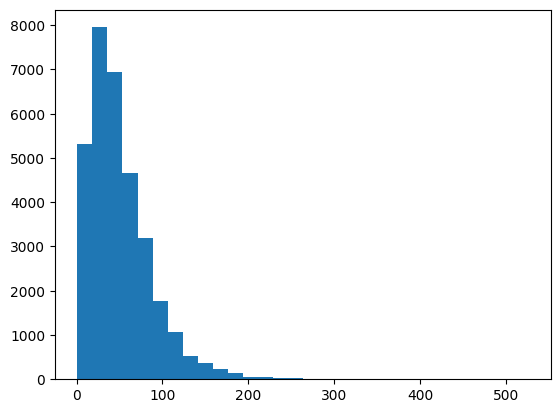

In [46]:
plt.hist(df['PM_US Post'], bins=30)
plt.show()

Text(0, 0.5, 'PRES')

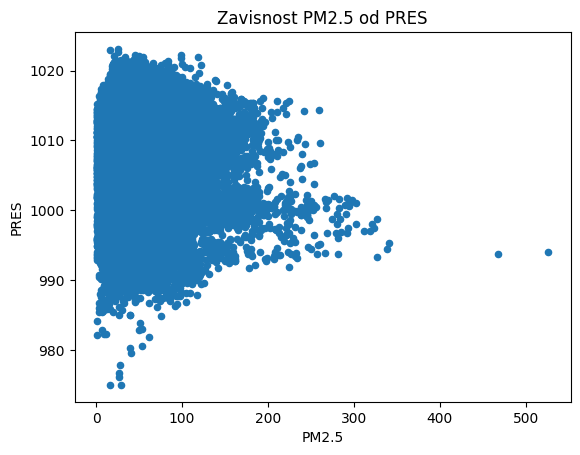

In [47]:
df.plot.scatter(x='PM_US Post', y='PRES')
plt.title('Zavisnost PM2.5 od PRES')
plt.xlabel('PM2.5')
plt.ylabel('PRES')


Text(0, 0.5, 'TEMP')

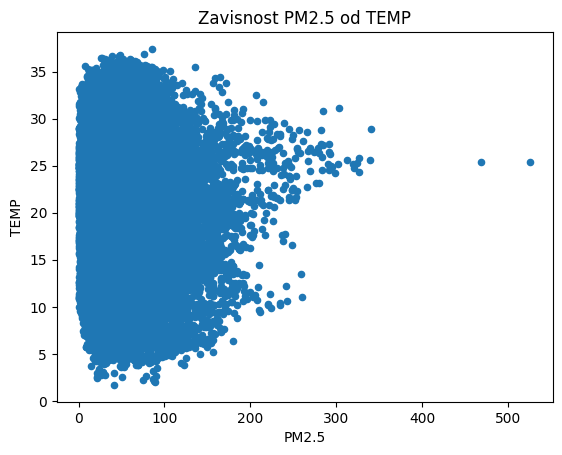

In [48]:
df.plot.scatter(x='PM_US Post', y='TEMP')
plt.title('Zavisnost PM2.5 od TEMP')
plt.xlabel('PM2.5')
plt.ylabel('TEMP')

Text(0, 0.5, 'HUMI')

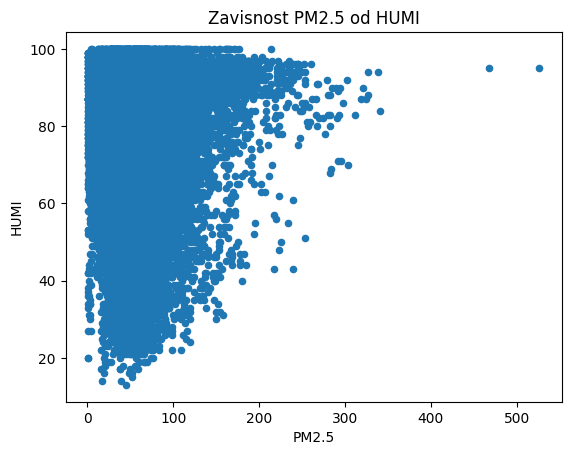

In [49]:
df.plot.scatter(x='PM_US Post', y='HUMI')
plt.title('Zavisnost PM2.5 od HUMI')
plt.xlabel('PM2.5')
plt.ylabel('HUMI')

Text(0, 0.5, 'DEWP')

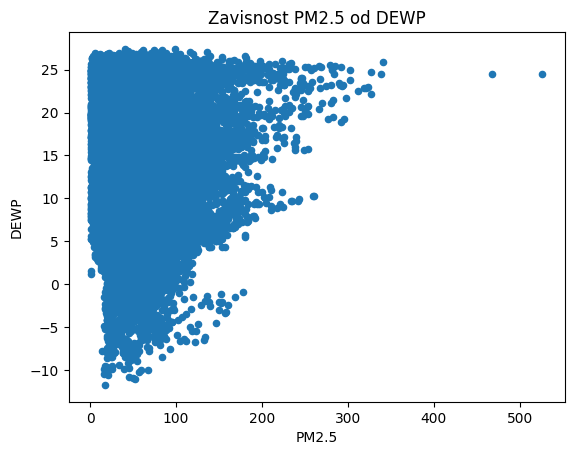

In [50]:
df.plot.scatter(x='PM_US Post', y='DEWP')
plt.title('Zavisnost PM2.5 od DEWP')
plt.xlabel('PM2.5')
plt.ylabel('DEWP')

Text(0, 0.5, 'precipitation')

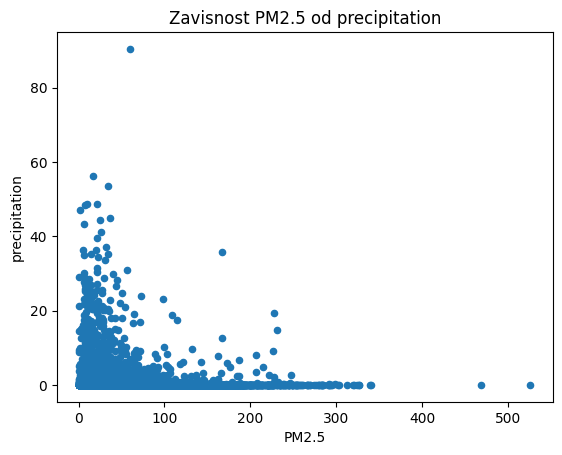

In [51]:
df.plot.scatter(x='PM_US Post', y='precipitation')
plt.title('Zavisnost PM2.5 od precipitation')
plt.xlabel('PM2.5')
plt.ylabel('precipitation')

Text(0, 0.5, 'Iws')

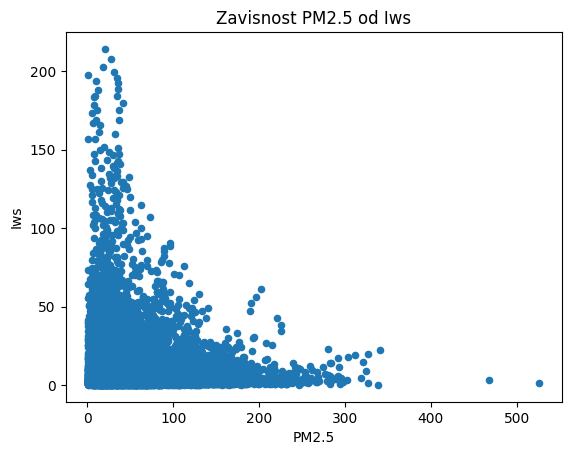

In [52]:
df.plot.scatter(x='PM_US Post', y='Iws')
plt.title('Zavisnost PM2.5 od Iws')
plt.xlabel('PM2.5')
plt.ylabel('Iws')

In [53]:
df['year'].unique()

array([2011, 2012, 2013, 2014, 2015])

Analizirati međusobne korelacije obeležja.

In [54]:

columns = ['HUMI', 'DEWP', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec']

for col in columns:
    corr = df['PM_US Post'].corr(df[col])
    print(f"korelacija PM_US Post i {col}: {corr:.3f}")

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        corr = df[columns[i]].corr(df[columns[j]])
        print(f"korelacija {columns[i]} i {columns[j]}: {corr:.3f}")


korelacija PM_US Post i HUMI: -0.031
korelacija PM_US Post i DEWP: -0.215
korelacija PM_US Post i PRES: 0.223
korelacija PM_US Post i TEMP: -0.220
korelacija PM_US Post i Iws: -0.099
korelacija PM_US Post i precipitation: -0.074
korelacija PM_US Post i Iprec: -0.110
korelacija HUMI i DEWP: 0.460
korelacija HUMI i PRES: -0.235
korelacija HUMI i TEMP: -0.102
korelacija HUMI i Iws: -0.129
korelacija HUMI i precipitation: 0.120
korelacija HUMI i Iprec: 0.167
korelacija DEWP i PRES: -0.843
korelacija DEWP i TEMP: 0.833
korelacija DEWP i Iws: -0.147
korelacija DEWP i precipitation: 0.071
korelacija DEWP i Iprec: 0.068
korelacija PRES i TEMP: -0.807
korelacija PRES i Iws: 0.040
korelacija PRES i precipitation: -0.088
korelacija PRES i Iprec: -0.082
korelacija TEMP i Iws: -0.094
korelacija TEMP i precipitation: 0.012
korelacija TEMP i Iprec: -0.017
korelacija Iws i precipitation: -0.009
korelacija Iws i Iprec: 0.012
korelacija precipitation i Iprec: 0.525


Iscrtati one sa najvecom korelacijom

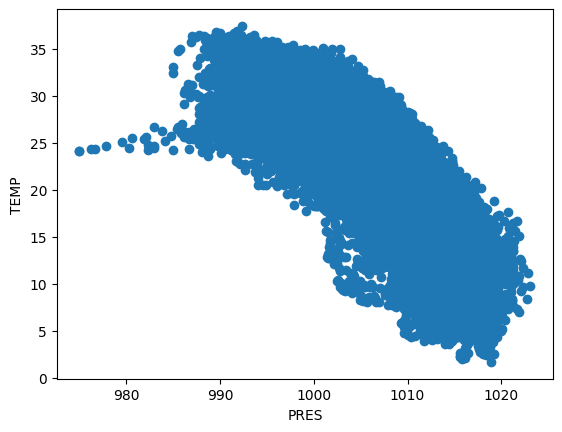

In [55]:
plt.scatter(df['PRES'], df['TEMP'])
plt.xlabel('PRES')
plt.ylabel('TEMP')
plt.show()

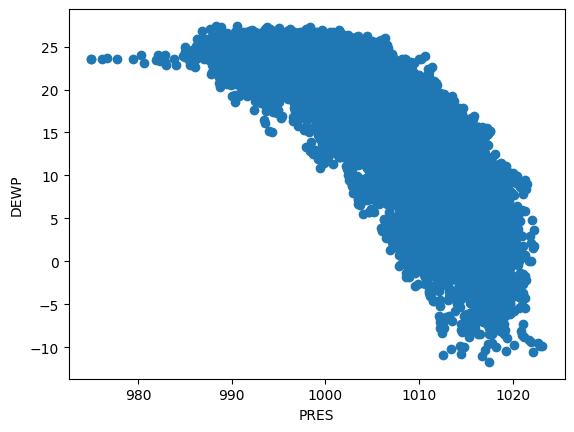

In [56]:
plt.scatter(df['PRES'], df['DEWP'])
plt.xlabel('PRES')
plt.ylabel('DEWP')
plt.show()

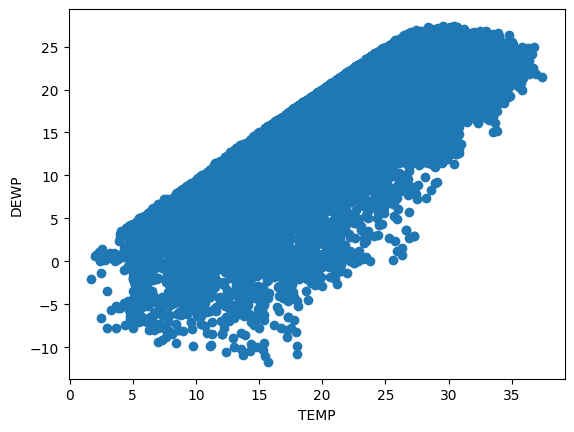

In [57]:
plt.scatter(df['TEMP'], df['DEWP'])
plt.xlabel('TEMP')
plt.ylabel('DEWP')
plt.show()

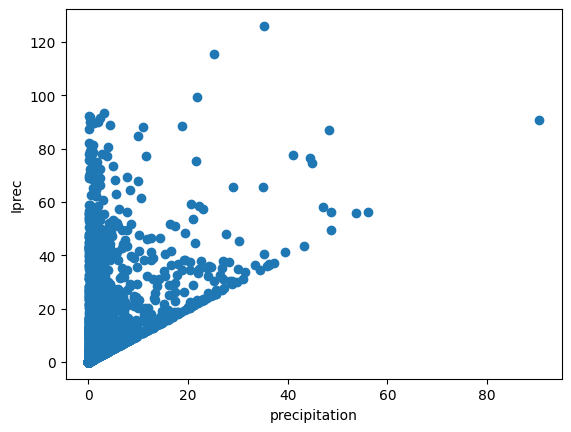

In [58]:
plt.scatter(df['precipitation'], df['Iprec'])
plt.xlabel('precipitation')
plt.ylabel('Iprec')
plt.show()

In [59]:
df['PM_US Post'].max()

526.0

In [60]:
df['PM_US Post'].min()

1.0

In [61]:
df.describe()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00,32347.00
mean,35507.51,2013.52,6.89,15.82,11.51,2.50,50.80,17.74,77.98,1004.57,22.21,7.96,0.25,1.04
std,10008.45,1.16,3.41,8.82,6.93,1.10,36.93,7.21,16.84,6.98,6.60,12.51,1.90,6.04
min,16550.00,2011.00,1.00,1.00,0.00,1.00,1.00,-11.70,13.00,975.00,1.70,0.00,0.00,0.00
25%,27006.50,2013.00,4.00,8.00,5.00,2.00,24.00,13.10,67.00,999.10,17.70,1.90,0.00,0.00
50%,35489.00,2014.00,7.00,16.00,12.00,2.00,43.00,19.70,82.00,1004.50,23.70,4.00,0.00,0.00
75%,44255.50,2015.00,10.00,23.00,18.00,3.00,68.00,23.80,92.00,1010.00,26.90,9.00,0.00,0.00
max,52583.00,2015.00,12.00,31.00,23.00,4.00,526.00,27.40,100.00,1023.10,37.40,214.30,90.40,126.00


Uraditi još nešto po sopstvenom izboru (takođe obavezna stavka).

In [62]:
def get_month_name(month):
    month_names = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December"
    }
    return month_names[month]

# Create a new DataFrame with a copy of the original DataFrame
df_new = df.copy()

# Use the apply() function to apply the get_month_name() function to each element of the "month" column in the new DataFrame
df_new["month"] = df_new["month"].apply(get_month_name)
df_new


,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
16549,16550,2011,November,21,13,3.00,48.00,13.90,64.00,1013.90,21.00,NE,10.90,0.00,0.00
16550,16551,2011,November,21,14,3.00,63.00,13.80,67.00,1012.70,20.10,NW,3.70,0.00,0.00
16551,16552,2011,November,21,15,3.00,71.00,14.30,68.00,1012.30,20.40,NW,6.50,0.00,0.00
16552,16553,2011,November,21,16,3.00,79.00,14.50,68.00,1012.00,20.60,NW,9.30,0.00,0.00
16553,16554,2011,November,21,17,3.00,78.00,14.20,69.00,1012.20,20.10,NE,2.20,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52578,52579,2015,December,31,18,4.00,52.00,10.10,68.00,1017.70,16.00,NW,9.50,0.00,0.00
52579,52580,2015,December,31,19,4.00,59.00,11.00,80.00,1018.30,14.40,NW,10.90,0.00,0.00
52580,52581,2015,December,31,20,4.00,58.00,11.40,82.00,1018.70,14.50,NW,12.90,0.00,0.00
52581,52582,2015,December,31,21,4.00,60.00,11.10,78.00,1019.30,14.90,NW,14.70,0.00,0.00


In [63]:
print("Najveća vrednost temperature rose :")
df_new['DEWP'].max()


Najveća vrednost temperature rose :


27.4

In [64]:
print("Minimalna vrednost temperature rose :")
df_new['DEWP'].min()

Minimalna vrednost temperature rose :


-11.7

In [65]:
dewp_july = df_new.loc[df_new["month"] == "July", :]
dewp_december = df_new.loc[df_new["month"] == "December", :]

opseg = np.linspace(-11.7, 27.4, 10)


frek_dewp_july = pd.cut(dewp_july["DEWP"], opseg, right=False, include_lowest=True).value_counts()
print("Učestalost po opsezima za temperaturu rose tokom jula:")
print(frek_dewp_july)


Učestalost po opsezima za temperaturu rose tokom jula:
[23.056, 27.4)      2447
[18.711, 23.056)     380
[14.367, 18.711)      17
[-11.7, -7.356)        0
[-7.356, -3.011)       0
[-3.011, 1.333)        0
[1.333, 5.678)         0
[5.678, 10.022)        0
[10.022, 14.367)       0
Name: DEWP, dtype: int64


In [66]:
dewp_december = df_new.loc[df_new["month"] == "December", :]
dewp_december = df_new.loc[df_new["month"] == "December", :]



frek_dewp_december = pd.cut(dewp_december["DEWP"], opseg, right=False, include_lowest=True).value_counts()
print("Učestalost po opsezima za temperaturu rose tokom decembra:")
print(frek_dewp_december)

Učestalost po opsezima za temperaturu rose tokom decembra:
[5.678, 10.022)     1069
[10.022, 14.367)     897
[1.333, 5.678)       652
[-3.011, 1.333)      367
[14.367, 18.711)     226
[-7.356, -3.011)     201
[18.711, 23.056)      53
[-11.7, -7.356)       39
[23.056, 27.4)         0
Name: DEWP, dtype: int64


Text(0, 0.5, 'Učestalost')

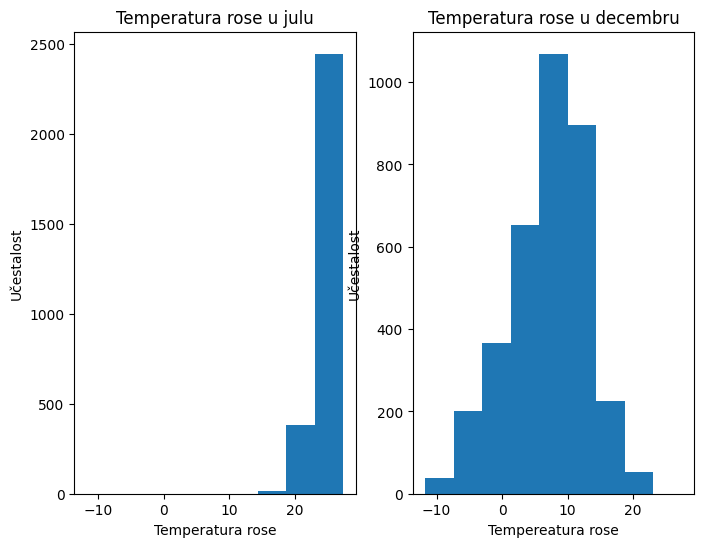

In [67]:
plt.figure(figsize=(8, 6))

plt.subplot(121)
plt.hist(dewp_july["DEWP"], opseg)

plt.title("Temperatura rose u julu")
plt.xlabel("Temperatura rose")
plt.ylabel("Učestalost")

plt.subplot(122)
plt.hist(dewp_december["DEWP"], opseg)

plt.title("Temperatura rose u decembru")
plt.xlabel("Tempereatura rose")
plt.ylabel("Učestalost")

DODATNA ANALIZA

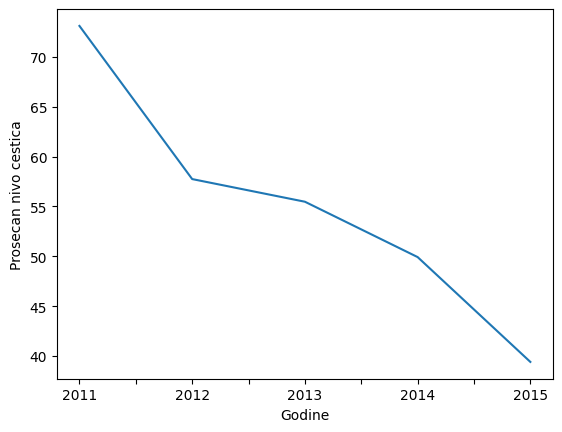

In [68]:
df['year'] = df['year'].astype(int).astype(str)
df.groupby('year')['PM_US Post'].mean().plot()
plt.xlabel('Godine')
plt.ylabel('Prosecan nivo cestica')
plt.show()

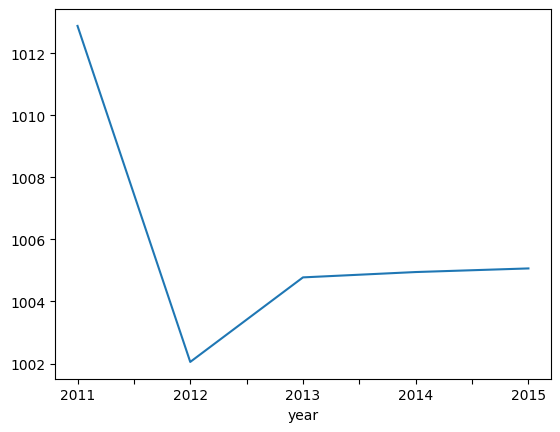

In [69]:
df['year'] = df['year'].astype(int).astype(str)
df.groupby('year')['PRES'].mean().plot()
plt.show()

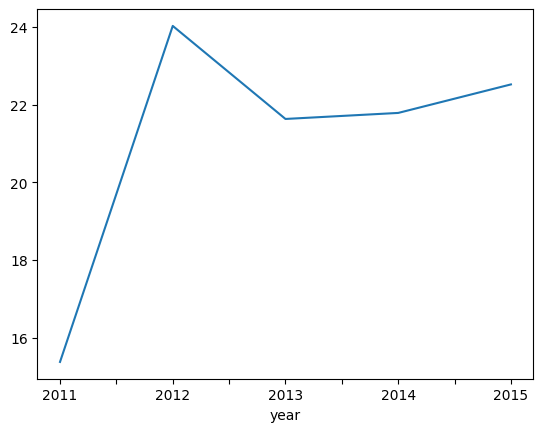

In [70]:
df['year'] = df['year'].astype(int).astype(str)
df.groupby('year')['TEMP'].mean().plot()
plt.show()

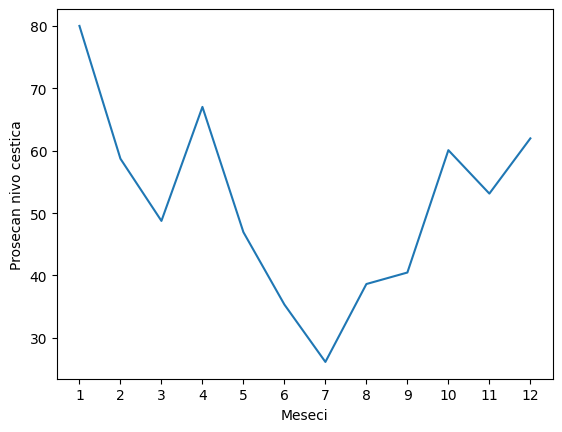

In [71]:
#monthly=df.groupby(['year','month'])['PM_US Post'].mean()
monthly=df.groupby('month')["PM_US Post"].mean().reset_index()

plt.plot(monthly['month'],  monthly['PM_US Post'], label= 'PM_US Post')
plt.xlabel('Meseci')
plt.ylabel('Prosecan nivo cestica')
plt.xticks(monthly['month'])
plt.show()

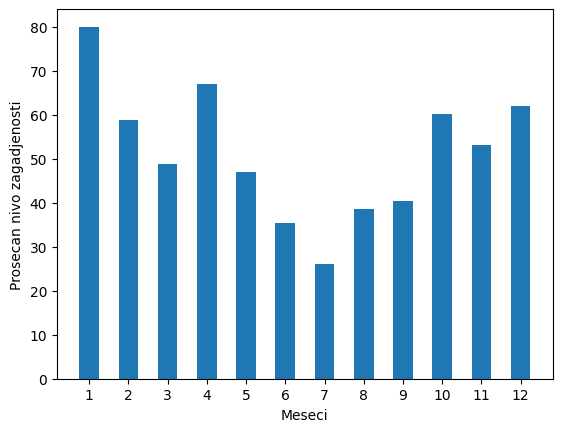

In [72]:
monthly=df.groupby('month')["PM_US Post"].mean()
#monthly.plot(kind='line')
plt.bar(monthly.index, monthly.values, width=0.5)
plt.xticks(range(1,13))
plt.xlabel('Meseci')
plt.ylabel('Prosecan nivo zagadjenosti')
plt.show()

LINEARNA REGRESIJA

Napraviti model linearne regresije koji predviđa koncengtraciju PM2.5 čestica.
1. Potrebno je 15% nasumično izabranih uzoraka ostaviti kao test skup, 15% kao validacioni a
preostalih 70% koristiti za obuku modela.
2. Isprobati različite hipoteze, regularizaciju modela, selekciju obeležja (unapred ili unazad).
3. Odabrati najbolji model linearne regresije i objasniti zašto je baš taj model odabran.


In [73]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [74]:
df["cbwd"] = df["cbwd"].replace(
    {
     "NE":"0",
     "SE":"1",
     "SW":"2",
     "NW":"3",
     "cv":"4"
     }
)

In [75]:
df.head()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
16549,16550,2011,11,21,13,3.00,48.00,13.90,64.00,1013.90,21.00,0,10.90,0.00,0.00
16550,16551,2011,11,21,14,3.00,63.00,13.80,67.00,1012.70,20.10,3,3.70,0.00,0.00
16551,16552,2011,11,21,15,3.00,71.00,14.30,68.00,1012.30,20.40,3,6.50,0.00,0.00
16552,16553,2011,11,21,16,3.00,79.00,14.50,68.00,1012.00,20.60,3,9.30,0.00,0.00
16553,16554,2011,11,21,17,3.00,78.00,14.20,69.00,1012.20,20.10,0,2.20,0.00,0.00


In [76]:

def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted) # np.mean((y_test-y_predicted)**2)
    mae = mean_absolute_error(y_test, y_predicted) # np.mean(np.abs(y_test-y_predicted))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)

    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

In [77]:
categorical_columns = ['No']
df = df.drop(categorical_columns, axis=1)


In [78]:
categorical_columns = ['year', 'month', 'day', 'hour', 'season']
df = df.drop(categorical_columns, axis=1)


In [79]:
from sklearn.model_selection import train_test_split

x = df.drop(['PM_US Post'], axis=1.).copy()
y = df['PM_US Post'].copy()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #0.7 trening skup

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42) #0.15 val i 0.15 test


print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

x_train shape: (22642, 8)
x_test shape: (4853, 8)
y_train shape: (22642,)
y_test shape: (4853,)
x_val shape: (4852, 8)
y_val shape: (4852,)


In [80]:
y.describe()

count   32347.00
mean       50.80
std        36.93
min         1.00
25%        24.00
50%        43.00
75%        68.00
max       526.00
Name: PM_US Post, dtype: float64

In [81]:
x.head()

,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
16549,13.90,64.00,1013.90,21.00,0,10.90,0.00,0.00
16550,13.80,67.00,1012.70,20.10,3,3.70,0.00,0.00
16551,14.30,68.00,1012.30,20.40,3,6.50,0.00,0.00
16552,14.50,68.00,1012.00,20.60,3,9.30,0.00,0.00
16553,14.20,69.00,1012.20,20.10,0,2.20,0.00,0.00


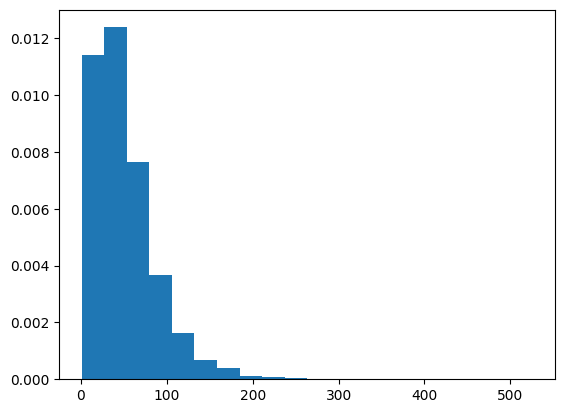

In [82]:

plt.hist(y, density= True, bins=20)
plt.show()

Mean squared error:  1239.2122377768292
Mean absolute error:  25.376975043102494
Root mean squared error:  35.202446474312396
R2 score:  0.08655835467824735
R2 adjusted score:  0.08623548395131886
        y  y_pred
0   20.00   44.78
1   19.00   41.88
2  207.00   43.60
3   92.00   60.20
4  133.00   55.30
5  184.00   71.26
6   59.00   62.74
7   28.00   47.98
8  105.00   41.55
9   43.00   53.78
10  32.00   43.87
11  52.00   49.89
12  20.00   60.29
13  87.00   55.47
14  17.00   35.68
15  42.00   45.47
16  30.00   67.23
17  44.00   52.90
18  24.00   43.39
19  61.00   51.05


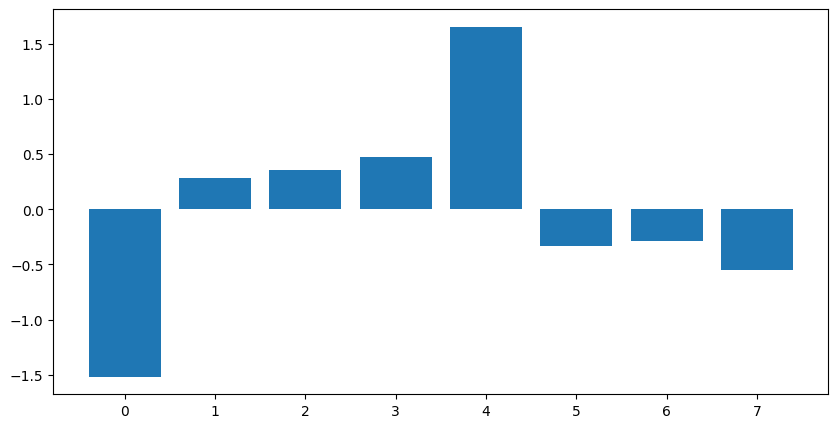

koeficijenti:  [-1.51687819  0.28770935  0.35238934  0.4738735   1.65288389 -0.33545164
 -0.28570682 -0.55347861]


In [83]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)
#true postoji teta0, false, bez teta0

# Obuka
first_regression_model.fit(x_train, y_train)

# Testiranje
y_predicted = first_regression_model.predict(x_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
plt.show()
print("koeficijenti: ", first_regression_model.coef_)

In [84]:
#selekcija obele\ja
import statsmodels.api as sm
X = sm.add_constant(x_train)

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     252.9
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:34:53   Log-Likelihood:            -1.1295e+05
No. Observations:               22642   AIC:                         2.259e+05
Df Residuals:                   22633   BIC:                         2.260e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -308.3727     73.357     -4.204      0.000    -452.158    -164.587
DEWP             -1.5169      0.385     -3.943      0.000      -2.271      -0.763
HUMI              0.2877      0.093      3.081      0.002       0.105       0.471
PRES              0.3524      0.070      5.050      0.000       0.216       0.489
TEMP              0.4739      0.385      1.230      0.219      -0.281       1.229
cbwd              1.6529      0.179      9.246      0.000       1.302       2.003
Iws              -0.3355      0.020    -17.171      0.000      -0.374      -0.297
precipitation    -0.2857      0.148     -1.926      0.054      -0.576       0.005
Iprec            -0.5535      0.046    -11.985      0.000      -0.644      -0.463
==============================================================================
Omnibus:                     9767.340   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68901.639
Skew:                           1.933   Prob(JB):                         0.00
Kurtosis:                      10.621   Cond. No.                     3.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
#X = sm.add_constant(x_train.drop('day', axis=1)) #ne treba mi to obelezje

#model = sm.OLS(y_train, X.astype('float')).fit()
#model.summary()

In [86]:
X = sm.add_constant(x_train.drop('TEMP', axis=1)) #ne treba mi to obelezje

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     288.8
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:34:53   Log-Likelihood:            -1.1295e+05
No. Observations:               22642   AIC:                         2.259e+05
Df Residuals:                   22634   BIC:                         2.260e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -277.6164     68.964     -4.026      0.000    -412.790    -142.443
DEWP             -1.0522      0.072    -14.604      0.000      -1.193      -0.911
HUMI              0.1748      0.017     10.230      0.000       0.141       0.208
PRES              0.3328      0.068      4.899      0.000       0.200       0.466
cbwd              1.6580      0.179      9.277      0.000       1.308       2.008
Iws              -0.3387      0.019    -17.491      0.000      -0.377      -0.301
precipitation    -0.2845      0.148     -1.918      0.055      -0.575       0.006
Iprec            -0.5490      0.046    -11.925      0.000      -0.639      -0.459
==============================================================================
Omnibus:                     9766.315   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68869.453
Skew:                           1.933   Prob(JB):                         0.00
Kurtosis:                      10.619   Cond. No.                     2.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
X = sm.add_constant(X.drop('precipitation', axis=1)) #ne treba mi to obelezje

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     336.2
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:34:53   Log-Likelihood:            -1.1295e+05
No. Observations:               22642   AIC:                         2.259e+05
Df Residuals:                   22635   BIC:                         2.260e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -283.5926     68.897     -4.116      0.000    -418.636    -148.549
DEWP          -1.0485      0.072    -14.558      0.000      -1.190      -0.907
HUMI           0.1736      0.017     10.167      0.000       0.140       0.207
PRES           0.3388      0.068      4.991      0.000       0.206       0.472
cbwd           1.6582      0.179      9.277      0.000       1.308       2.009
Iws           -0.3379      0.019    -17.455      0.000      -0.376      -0.300
Iprec         -0.5937      0.040    -14.950      0.000      -0.672      -0.516
==============================================================================
Omnibus:                     9763.314   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68808.726
Skew:                           1.932   Prob(JB):                         0.00
Kurtosis:                      10.616   Cond. No.                     2.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
numeric_feats = [item for item in x.columns if 'cbwd' not in item]
print(numeric_feats)
dummy_feats = [item for item in x.columns if 'cbwd' in item]
print(dummy_feats)

['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec']
['cbwd']


In [89]:
# Standardizacija obelezja (svodjenje na sr.vr. 0 i varijansu 1)
scaler = StandardScaler()
scaler.fit(x_train[numeric_feats])

x_train_std = pd.DataFrame(scaler.transform(x_train[numeric_feats]), columns = numeric_feats)
x_test_std = pd.DataFrame(scaler.transform(x_test[numeric_feats]), columns = numeric_feats)

x_train_std = pd.concat([x_train_std, x_train[dummy_feats].reset_index(drop=True)], axis=1)
x_test_std = pd.concat([x_test_std, x_test[dummy_feats].reset_index(drop=True)], axis=1)

x_train_std.head()

,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,cbwd
0,0.84,0.18,0.14,0.79,-0.14,-0.13,-0.17,1
1,-0.61,0.89,0.77,-1.16,-0.21,-0.13,-0.17,3
2,0.65,0.12,-0.20,0.59,-0.44,-0.13,-0.17,2
3,-0.38,1.01,-0.19,-0.97,-0.57,-0.13,-0.17,0
4,0.48,0.83,0.34,0.06,-0.53,-0.13,-0.17,3


Mean squared error:  1239.212237776829
Mean absolute error:  25.3769750431025
Root mean squared error:  35.20244647431239
R2 score:  0.08655835467824757
R2 adjusted score:  0.08623548395131897
        y  y_pred
0   20.00   44.78
1   19.00   41.88
2  207.00   43.60
3   92.00   60.20
4  133.00   55.30
5  184.00   71.26
6   59.00   62.74
7   28.00   47.98
8  105.00   41.55
9   43.00   53.78
10  32.00   43.87
11  52.00   49.89
12  20.00   60.29
13  87.00   55.47
14  17.00   35.68
15  42.00   45.47
16  30.00   67.23
17  44.00   52.90
18  24.00   43.39
19  61.00   51.05


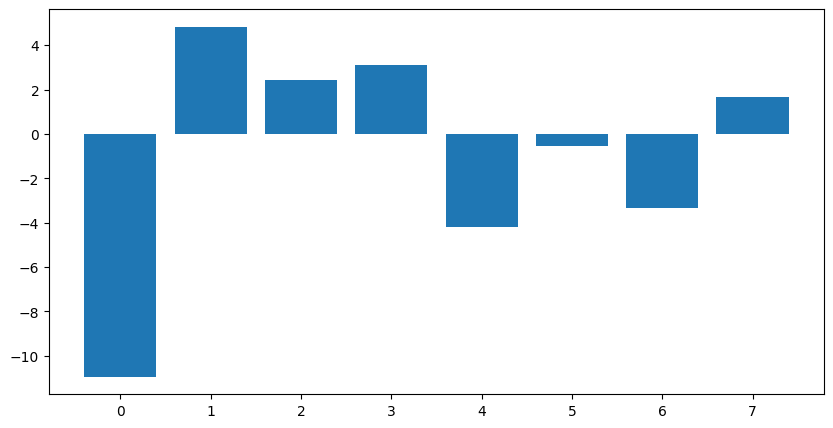

koeficijenti:  [-10.94773144   4.83377968   2.45315991   3.12828427  -4.2026547
  -0.53316259  -3.35614515   1.65288389]


In [90]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
regression_model_std = LinearRegression()

# Obuka modela
regression_model_std.fit(x_train_std, y_train)

# Testiranje
y_predicted = regression_model_std.predict(x_test_std)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_std.coef_)),regression_model_std.coef_)
plt.show()
print("koeficijenti: ", regression_model_std.coef_)

['DEWP' 'HUMI' 'PRES' 'TEMP' 'Iws' 'precipitation' 'Iprec' 'cbwd'
 'DEWP HUMI' 'DEWP PRES' 'DEWP TEMP' 'DEWP Iws' 'DEWP precipitation'
 'DEWP Iprec' 'DEWP cbwd' 'HUMI PRES' 'HUMI TEMP' 'HUMI Iws'
 'HUMI precipitation' 'HUMI Iprec' 'HUMI cbwd' 'PRES TEMP' 'PRES Iws'
 'PRES precipitation' 'PRES Iprec' 'PRES cbwd' 'TEMP Iws'
 'TEMP precipitation' 'TEMP Iprec' 'TEMP cbwd' 'Iws precipitation'
 'Iws Iprec' 'Iws cbwd' 'precipitation Iprec' 'precipitation cbwd'
 'Iprec cbwd']
Mean squared error:  1186.3201700101022
Mean absolute error:  24.687462310247682
Root mean squared error:  34.44299885332435
R2 score:  0.12554587911714798
R2 adjusted score:  0.12415325145283551
        y  y_pred
0   20.00   45.02
1   19.00   39.00
2  207.00   33.15
3   92.00   59.99
4  133.00   59.88
5  184.00   82.91
6   59.00   72.79
7   28.00   46.55
8  105.00   46.08
9   43.00   58.63
10  32.00   28.35
11  52.00   50.31
12  20.00   62.55
13  87.00   51.24
14  17.00   31.43
15  42.00   26.56
16  30.00   71.30
17  44.

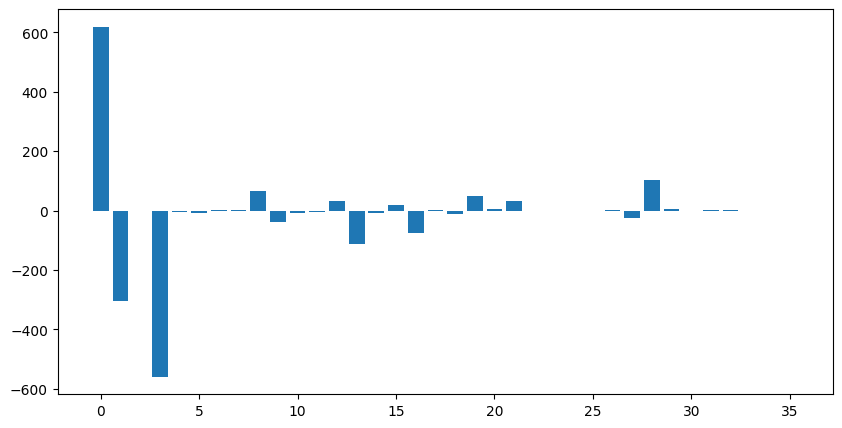

koeficijenti:  [ 6.19003751e+02 -3.05065947e+02 -1.60128097e-02 -5.59334573e+02
 -5.30157493e+00 -7.79959117e+00  2.11004202e+00  1.47887635e+00
  6.65878288e+01 -3.77537477e+01 -7.23873739e+00 -4.45264409e+00
  3.13444495e+01 -1.11792255e+02 -6.83275749e+00  2.05144066e+01
 -7.48386087e+01  1.66839411e+00 -1.00097183e+01  5.00802953e+01
  4.21718383e+00  3.11228335e+01 -8.52521314e-01  3.98181422e-01
 -3.59276352e-01 -4.09587219e-01  2.75055918e+00 -2.57574338e+01
  1.04311788e+02  4.26327481e+00 -4.75897587e-01  5.78453978e-01
  9.98726886e-01  3.12231962e-01 -2.21358860e-01 -5.84567650e-01]


In [91]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

print(poly.get_feature_names_out())

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...

# Inicijalizacija
regression_model_inter = LinearRegression()

# Obuka modela
regression_model_inter.fit(x_inter_train, y_train)

# Testiranje
y_predicted = regression_model_inter.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
plt.show()
print("koeficijenti: ", regression_model_inter.coef_)

['DEWP' 'HUMI' 'PRES' 'TEMP' 'Iws' 'precipitation' 'Iprec' 'cbwd' 'DEWP^2'
 'DEWP HUMI' 'DEWP PRES' 'DEWP TEMP' 'DEWP Iws' 'DEWP precipitation'
 'DEWP Iprec' 'DEWP cbwd' 'HUMI^2' 'HUMI PRES' 'HUMI TEMP' 'HUMI Iws'
 'HUMI precipitation' 'HUMI Iprec' 'HUMI cbwd' 'PRES^2' 'PRES TEMP'
 'PRES Iws' 'PRES precipitation' 'PRES Iprec' 'PRES cbwd' 'TEMP^2'
 'TEMP Iws' 'TEMP precipitation' 'TEMP Iprec' 'TEMP cbwd' 'Iws^2'
 'Iws precipitation' 'Iws Iprec' 'Iws cbwd' 'precipitation^2'
 'precipitation Iprec' 'precipitation cbwd' 'Iprec^2' 'Iprec cbwd'
 'cbwd^2']
Mean squared error:  1173.2899627285879
Mean absolute error:  24.42084253511364
Root mean squared error:  34.25332046281919
R2 score:  0.1351506373783018
R2 adjusted score:  0.13346663631818956
        y  y_pred
0   20.00   44.62
1   19.00   33.81
2  207.00   34.65
3   92.00   63.15
4  133.00   60.83
5  184.00   83.28
6   59.00   74.82
7   28.00   48.38
8  105.00   46.99
9   43.00   60.56
10  32.00   29.79
11  52.00   50.96
12  20.00   63.66

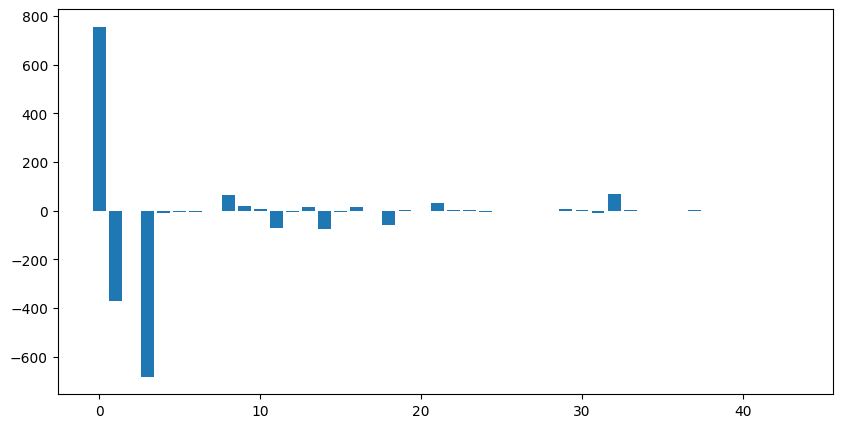

koeficijenti:  [ 7.56410201e+02 -3.72064638e+02 -8.69141273e-01 -6.82262134e+02
 -8.63231110e+00 -5.35581535e+00 -3.82400469e+00 -8.45434344e-01
  6.35490818e+01  1.79083723e+01  7.19154096e+00 -7.09051547e+01
 -5.44183911e+00  1.42019925e+01 -7.32807324e+01 -4.38717052e+00
  1.54509518e+01 -1.98947258e+00 -5.97543840e+01  3.54382394e+00
 -2.18643204e+00  3.33667346e+01  3.12736502e+00  2.19270282e+00
 -5.31205694e+00  7.11717896e-01  1.10990387e+00 -4.58316179e-01
  7.03944723e-02  7.99063561e+00  4.88051927e+00 -9.46046470e+00
  6.88736743e+01  2.65754652e+00  5.94825891e-01 -3.65002442e-01
  3.02605992e-01  1.89334595e+00  9.57746202e-02 -8.36417270e-02
 -2.52403074e-01  4.28312597e-01 -4.99672704e-01  7.98767070e-01]


In [92]:

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

print(poly.get_feature_names_out())

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...

# Inicijalizacija
regression_model_inter = LinearRegression()

# Obuka modela
regression_model_inter.fit(x_inter_train, y_train)

# Testiranje
y_predicted = regression_model_inter.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
plt.show()
print("koeficijenti: ", regression_model_inter.coef_)

Mean squared error:  1185.8297460718422
Mean absolute error:  24.51361097779236
Root mean squared error:  34.43587876142908
R2 score:  0.12590737784627037
R2 adjusted score:  0.12420537867050518
        y  y_pred
0   20.00   38.64
1   19.00   34.09
2  207.00   35.43
3   92.00   62.71
4  133.00   61.25
5  184.00   82.88
6   59.00   72.04
7   28.00   39.66
8  105.00   44.81
9   43.00   55.86
10  32.00   30.85
11  52.00   44.90
12  20.00   66.21
13  87.00   56.62
14  17.00   32.87
15  42.00   33.28
16  30.00   66.38
17  44.00   57.34
18  24.00   27.87
19  61.00   60.59


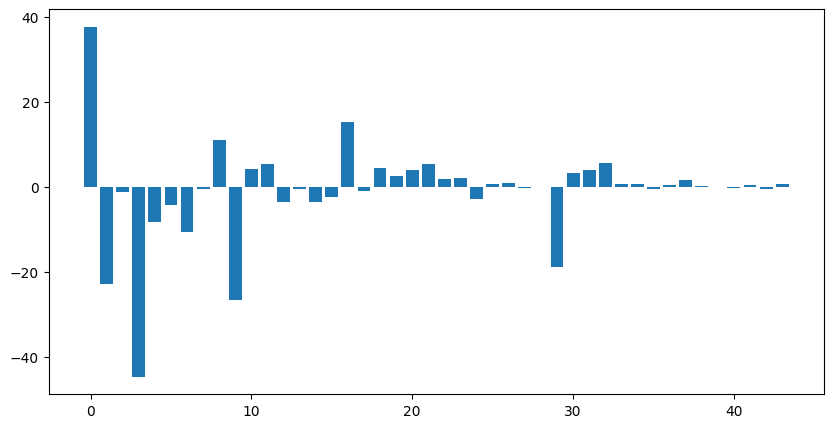

koeficijenti:  [ 3.76602984e+01 -2.29807754e+01 -1.18349779e+00 -4.47085268e+01
 -8.24641227e+00 -4.28855856e+00 -1.05836276e+01 -5.75585590e-01
  1.09711953e+01 -2.65856374e+01  4.07921361e+00  5.25102631e+00
 -3.68799538e+00 -5.79102693e-01 -3.48291008e+00 -2.31821496e+00
  1.53262912e+01 -9.45304805e-01  4.52783394e+00  2.52872985e+00
  4.01707163e+00  5.43165609e+00  1.83384023e+00  2.15242748e+00
 -2.75934777e+00  6.63825495e-01  9.86724336e-01 -3.42918582e-01
  1.43584842e-02 -1.87704279e+01  3.36096583e+00  3.91952253e+00
  5.54949665e+00  6.82963357e-01  5.62757860e-01 -4.12160308e-01
  3.50875312e-01  1.61185478e+00  9.42957533e-02 -9.59511074e-02
 -2.49737325e-01  4.49127978e-01 -4.41384579e-01  6.31142215e-01]


In [93]:
# RIDGE

# Inicijalizacija
ridge_model = Ridge(alpha=5)

# Obuka modela
ridge_model.fit(x_inter_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+06, tolerance: 3.109e+03
  model = cd_fast.enet_coordinate_descent(


Mean squared error:  1187.2848468322547
Mean absolute error:  24.529860672725402
Root mean squared error:  34.456999968544196
R2 score:  0.12483480158194571
R2 adjusted score:  0.12313071392737229
        y  y_pred
0   20.00   38.50
1   19.00   34.47
2  207.00   35.39
3   92.00   62.65
4  133.00   61.32
5  184.00   82.91
6   59.00   71.65
7   28.00   39.31
8  105.00   44.45
9   43.00   55.50
10  32.00   30.87
11  52.00   44.80
12  20.00   66.85
13  87.00   57.00
14  17.00   33.03
15  42.00   33.48
16  30.00   66.33
17  44.00   56.94
18  24.00   28.57
19  61.00   60.13


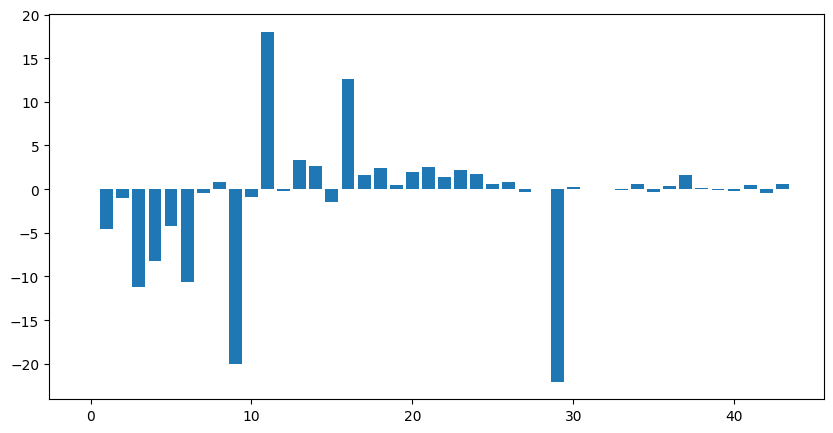

koeficijenti:  [  0.          -4.55593395  -1.00315765 -11.19996154  -8.24870067
  -4.2031503  -10.67836342  -0.39248171   0.79084975 -20.08061415
  -0.95354766  18.02262034  -0.26813417   3.37469724   2.63690544
  -1.51949835  12.61773723   1.62815658   2.3651145    0.51214324
   1.94974165   2.56836261   1.36870514   2.1520066    1.71317845
   0.5535233    0.8337195   -0.32497369  -0.03986849 -22.0710748
   0.2661977    0.           0.          -0.07577422   0.54323935
  -0.3584209    0.3601268    1.57225965   0.08971595  -0.08838842
  -0.25774815   0.44287836  -0.43505852   0.57116858]


In [94]:
# LASSO

# Model initialization
lasso_model = Lasso(alpha=0.01)

# Fit the data(train the model)
lasso_model.fit(x_inter_train, y_train)

# Predict
y_predicted = lasso_model.predict(x_inter_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
plt.show()
print("koeficijenti: ", lasso_model.coef_)

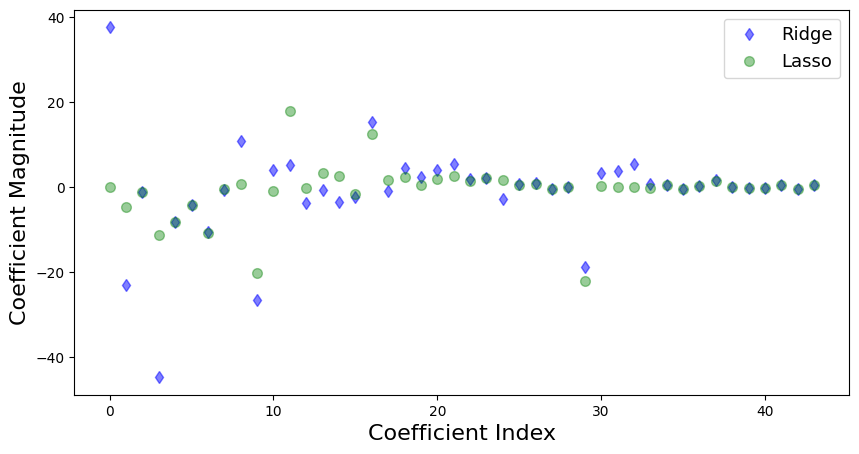

In [95]:
plt.figure(figsize=(10,5))
#plt.plot(regression_model_degree.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'linear',zorder=7) # zorder for ordering the markers
plt.plot(ridge_model.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge') # alpha here is for transparency
plt.plot(lasso_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Lasso')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='best')
plt.show()

Napraviti klasifikator koji koristi kNN metodu za klasifikaciju uzoraka u jednu od 3 grupe zagađenja.
1. Prvo je potrebno uzorcima iz date baze dodeliti labele: bezbedno, nebezbedno ili opasno.
Uzorcima čija je vrednost koncentracije PM2.5 čestica do 55.4 µg/m3 dodeliti labelu bezbedno,
onima čija je vrednost koncentracije PM2.5 čestica od 55.5 µg/m3 do 150.4 µg/m3 dodeliti labelu
nebezbedno, dok onima sa vrednošću preko 150.5 µg/m3 dodeliti labelu opasno.
2. Koristiti 15% uzoraka za testiranje finalnog klasifikatora, a preostalih 85% uzoraka koristiti za
metodu unakrsne validacije sa 10 podskupova. Ovom metodom odrediti optimalne parametre
klasifikatora, oslanjajući se na željenu meru uspešnosti. Obratiti pažnju da u svakom od
podskupova za unakrsnu validaciju, kao i u test skupu, bude dovoljan broj uzoraka svake klase.
3. Za konačno odabrane parametre prikazati i analizirati matricu konfuzije dobijenu akumulacijom
matrica iz svake od 10 iteracija unakrsne validacije. Odrediti prosečnu tačnost klasifikatora, kao i
tačnost za svaku klasu.
4. Klasifikator sa konačno odabranim parametrima obučiti na celokupnom trening skupu, pa testirati
na izdvojenom test skupu. Na osnovu dobijene matrice konfuzije izračunati mere uspešnosti
klasifikatora, kao i mere uspešnosti.


In [96]:
cestice= [
    (df['PM_US Post'] <= 55.4),
    (df['PM_US Post'] >= 55.5) & (df['PM_US Post']<=150.4),
    (df['PM_US Post'] >= 150.5)]
vrednost = [1,2,3]

df['Labela']=np.select(cestice, vrednost)


In [97]:
df.head()

,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,Labela
16549,48.00,13.90,64.00,1013.90,21.00,0,10.90,0.00,0.00,1
16550,63.00,13.80,67.00,1012.70,20.10,3,3.70,0.00,0.00,2
16551,71.00,14.30,68.00,1012.30,20.40,3,6.50,0.00,0.00,2
16552,79.00,14.50,68.00,1012.00,20.60,3,9.30,0.00,0.00,2
16553,78.00,14.20,69.00,1012.20,20.10,0,2.20,0.00,0.00,2


In [98]:
df['Labela'] = df['Labela'].replace(1, "bezbedno")
df['Labela'] = df['Labela'].replace(2, "nebezbedno")
df['Labela'] = df['Labela'].replace(3, "opasno")

In [99]:
df.head()

,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,Labela
16549,48.00,13.90,64.00,1013.90,21.00,0,10.90,0.00,0.00,bezbedno
16550,63.00,13.80,67.00,1012.70,20.10,3,3.70,0.00,0.00,nebezbedno
16551,71.00,14.30,68.00,1012.30,20.40,3,6.50,0.00,0.00,nebezbedno
16552,79.00,14.50,68.00,1012.00,20.60,3,9.30,0.00,0.00,nebezbedno
16553,78.00,14.20,69.00,1012.20,20.10,0,2.20,0.00,0.00,nebezbedno


In [100]:
x = df.iloc[:, :-1].copy()
y=df.iloc[:, -1].copy()

Koristiti 15% uzoraka za testiranje finalnog klasifikatora, a preostalih 85% uzoraka koristiti za
metodu unakrsne validacije sa 10 podskupova

In [102]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42, stratify=y)


print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))


x_train shape: (27494, 9)
x_test shape: (4853, 9)
y_train shape: (27494,)
y_test shape: (4853,)


In [103]:
from sklearn.neighbors import KNeighborsClassifier
klasifikator = KNeighborsClassifier()
klasifikator.fit(x_train, y_train)

KNeighborsClassifier()

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluation_classif(mat_konf):
    klase = ['bezbedan', 'nebezbedan', 'opasan']

def tacnost_po_klasi(mat_konf, klase):
    tacnost_i = []
    N= mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)), i)
        TP = mat_konf[i,i]
        F=0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[i,j]))
        TN = sum(sum(mat_konf)) - F - TP
        tacnost_i.append((TP+TN)/sum(sum(mat_konf)))
        print('Za klasu ', klase[i], ' tacnost je: ', tacnost_i[i])
    tacnost_avg = np.mean(tacnost_i)
    return tacnost_avg

In [114]:
def osetljivost_po_klasi(mat_konf, klase):
    osetljivost_i = []
    N= mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)), i)
        TP = mat_konf[i,i]
        F=0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[i,j]))
        TN = sum(sum(mat_konf)) - F - TP
        osetljivost_i.append((TP+TN)/sum(sum(mat_konf)))
        print('Za klasu ', klase[i], ' osetljivost je: ', osetljivost_i[i])
    osetljivost_avg = np.mean(osetljivost_i)
    return osetljivost_avg

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(x, y)
klase = ['bezbedno', 'nebezbedno', 'opasno']
acc=[]
fin_conf_mat = np.zeros((len(np.unique(y)), len(np.unique(y))))

for train_index, test_index in indexes:
  x_train = x.iloc[train_index, :]
  x_test = x.iloc[test_index, :]
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]

 # scaler = StandardScaler()
#  scaler.fit(x_train)
#  x_train = scaler.transform(x_train)
 # x_test = scaler.transform(x_test)

  classifier = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)

  conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
  fin_conf_mat += conf_mat

print('Konačna matrica konfuzije:')
print(fin_conf_mat)

tacnost_avg = tacnost_po_klasi(fin_conf_mat, klase)
osetljivost_avg = osetljivost_po_klasi(fin_conf_mat, klase)

print('Prosečna mera tačnosti:', tacnost_avg)
print('Prosečna mera osetljivosti:', osetljivost_avg)

Konačna matrica konfuzije:
[[2.0675e+04 1.8600e+02 0.0000e+00]
 [1.9900e+02 1.0541e+04 2.6000e+01]
 [0.0000e+00 2.0000e+01 7.0000e+02]]
Za klasu  bezbedno  tacnost je:  0.9884997063097042
Za klasu  nebezbedno  tacnost je:  0.9860883544069001
Za klasu  opasno  tacnost je:  0.9987634092806134
Za klasu  bezbedno  osetljivost je:  0.9884997063097042
Za klasu  nebezbedno  osetljivost je:  0.9860883544069001
Za klasu  opasno  osetljivost je:  0.9987634092806134
Prosečna mera tačnosti: 0.9911171566657392
Prosečna mera osetljivosti: 0.9911171566657392


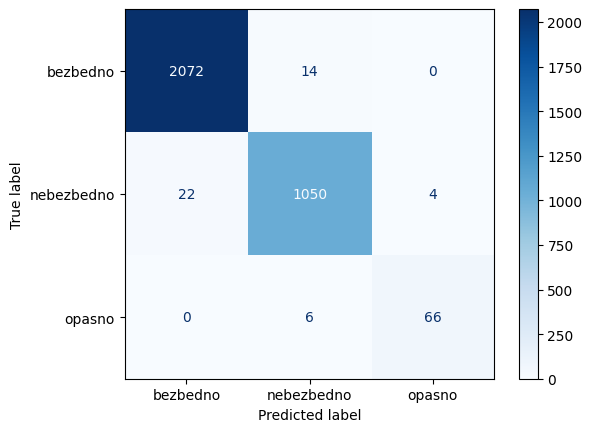

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#obuka finalnog modela
knn=KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)

disp= ConfusionMatrixDisplay.from_predictions(y_true= y_test,  y_pred=y_pred,  labels = knn.classes_, cmap=plt.cm.Blues)
plt.show()
evaluation_classif(conf_mat)


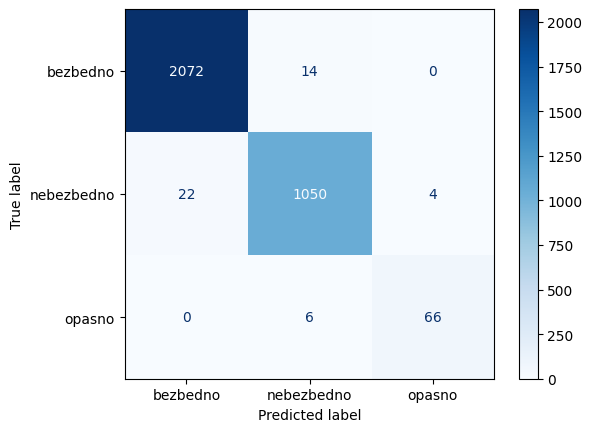

Tačnost: 0.99
              precision    recall  f1-score   support

    bezbedno       0.99      0.99      0.99      2086
  nebezbedno       0.98      0.98      0.98      1076
      opasno       0.94      0.92      0.93        72

    accuracy                           0.99      3234
   macro avg       0.97      0.96      0.97      3234
weighted avg       0.99      0.99      0.99      3234



In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Obuka finalnog modela
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Obuka modela na celokupnom trening skupu
knn.fit(x_train, y_train)

# Testiranje modela na izdvojenom test skupu
y_pred = knn.predict(x_test)

# Računanje matrice konfuzije
conf_mat = confusion_matrix(y_test, y_pred)

# Prikaz matrice konfuzije
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Računanje tačnosti
accuracy = accuracy_score(y_test, y_pred)
print(f'Tačnost: {accuracy:.2f}')

# Prikaz izveštaja o klasifikaciji
classification_rep = classification_report(y_test, y_pred, target_names=knn.classes_)
print(classification_rep)
